In [399]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
from functions import *
from operator import truediv
import scipy.stats as stats
from statsmodels.stats.power import TTestIndPower

In [227]:
df = requests.get('https://download.data.world/s/6ekq6uekejmenvbmsqjoyhjegnqbal')

In [228]:
import pandas as pd
df = pd.read_csv('https://query.data.world/s/74mkuwtm5d5w4sao5tm6ephwsktkh7')

In [229]:
df1 = pd.read_csv('https://data.world/datafiniti/fast-food-restaurants-across-america/workspace/query?queryid=sample-0')

In [230]:
df


,id,dateAdded,dateUpdated,address,categories,city,country,keys,latitude,longitude,name,postalCode,province,sourceURLs,websites
0,AVwcmSyZIN2L1WUfmxyw,2015-10-19T23:47:58Z,2018-06-26T03:00:14Z,800 N Canal Blvd,American Restaurant and Fast Food Restaurant,Thibodaux,US,us/la/thibodaux/800ncanalblvd/1780593795,29.814697,-90.814742,SONIC Drive In,70301,LA,https://foursquare.com/v/sonic-drive-in/4b7361...,https://locations.sonicdrivein.com/la/thibodau...
1,AVwcmSyZIN2L1WUfmxyw,2015-10-19T23:47:58Z,2018-06-26T03:00:14Z,800 N Canal Blvd,Fast Food Restaurants,Thibodaux,US,us/la/thibodaux/800ncanalblvd/1780593795,29.814697,-90.814742,SONIC Drive In,70301,LA,https://foursquare.com/v/sonic-drive-in/4b7361...,https://locations.sonicdrivein.com/la/thibodau...
2,AVwcopQoByjofQCxgfVa,2016-03-29T05:06:36Z,2018-06-26T02:59:52Z,206 Wears Valley Rd,Fast Food Restaurant,Pigeon Forge,US,us/tn/pigeonforge/206wearsvalleyrd/-864103396,35.803788,-83.580553,Taco Bell,37863,TN,https://www.yellowpages.com/pigeon-forge-tn/mi...,"http://www.tacobell.com,https://locations.taco..."
3,AVweXN5RByjofQCxxilK,2017-01-03T07:46:11Z,2018-06-26T02:59:51Z,3652 Parkway,Fast Food,Pigeon Forge,US,us/tn/pigeonforge/3652parkway/93075755,35.782339,-83.551408,Arby's,37863,TN,http://www.yellowbook.com/profile/arbys_163389...,"http://www.arbys.com,https://locations.arbys.c..."
4,AWQ6MUvo3-Khe5l_j3SG,2018-06-26T02:59:43Z,2018-06-26T02:59:43Z,2118 Mt Zion Parkway,Fast Food Restaurant,Morrow,US,us/ga/morrow/2118mtzionparkway/1305117222,33.562738,-84.321143,Steak 'n Shake,30260,GA,https://foursquare.com/v/steak-n-shake/4bcf77a...,http://www.steaknshake.com/locations/23851-ste...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,AV12gJwna4HuVbed9Ayg,2017-07-24T21:28:46Z,2018-04-07T13:19:06Z,3460 Robinhood Rd,Fast Food Restaurants,Winston-Salem,US,us/nc/winston-salem/3460robinhoodrd/-66712705,36.117563,-80.316553,Pizza Hut,27106,NC,https://www.allmenus.com/nc/winston-salem/7341...,http://www.pizzahut.com
9996,AV12gJxKIxWefVJwhpzS,2017-07-24T21:28:46Z,2018-04-07T13:19:05Z,3069 Kernersville Rd,Fast Food Restaurants,Winston-Salem,US,us/nc/winston-salem/3069kernersvillerd/-66712705,36.077718,-80.176748,Pizza Hut,27107,NC,https://www.allmenus.com/nc/winston-salem/7340...,http://www.pizzahut.com
9997,AVwdJMdSByjofQCxl8Vr,2015-10-24T00:17:32Z,2018-04-07T13:19:05Z,838 S Main St,Fast Food Restaurants,Kernersville,US,us/nc/kernersville/838smainst/-66712705,36.111015,-80.089165,Pizza Hut,27284,NC,https://www.allmenus.com/nc/kernersville/73400...,http://www.pizzahut.com
9998,AVwdl2cykufWRAb57ZPs,2016-04-05T02:59:45Z,2018-04-07T13:19:05Z,1702 Glendale Dr SW,Fast Food Restaurants,Wilson,US,us/nc/wilson/1702glendaledrsw/-66712705,35.719981,-77.945795,Pizza Hut,27893,NC,https://www.allmenus.com/nc/wilson/73403-pizza...,http://www.pizzahut.com


In [231]:
df1 = df[['name','city','province','postalCode','latitude', 'longitude']]

In [232]:
df2 = df1.loc[df1['province'] == 'CA']

In [233]:
from functions import *

In [234]:
df2.sort_values('latitude')


,name,city,province,postalCode,latitude,longitude
8240,KFC,San Ysidro,CA,92173,32.547300,-117.034180
3336,Carl's Jr.,San Diego,CA,92154,32.555605,-116.936986
5065,Taco Bell,San Diego,CA,92154,32.582324,-117.033004
9316,Rally's,San Diego,CA,92154,32.583460,-117.099830
1686,Burger King,Imperial Beach,CA,91932,32.584401,-117.108462
...,...,...,...,...,...,...
5059,McDonald's,Weed,CA,96094,41.397659,-122.378968
5646,King Wah,Alturas,CA,96101,41.494560,-120.546840
3450,SUBWAY,Crescent City,CA,95531,41.752810,-124.187050
516,Taco Bell,Crescent City,CA,95531,41.755062,-124.193834


In [235]:
df3 = df2[['name','city','province','postalCode']]

df4 = df3.sort_values('city')

In [236]:
df5 = df4.rename(columns = {'city':'City'})
df5

,name,City,province,postalCode
1074,Baskin-Robbins,Agoura Hills,CA,91301
1075,Ameci Pizza & Pasta,Agoura Hills,CA,91301
9847,Panera Bread,Alameda,CA,94501
1888,Round Table Pizza,Alameda,CA,94501
3844,Carl's Jr.,Alameda,CA,94501
...,...,...,...,...
2478,Baskin-Robbins,Woodland Hills,CA,91364
691,Jack in the Box,Woodland Hills,CA,91367
6978,Wendy's,Yucaipa,CA,92399
2300,Subway,Yucaipa,CA,92399


In [237]:
page = requests.get("https://www.zip-codes.com/state/ca.asp")

In [238]:
df10 = pd.read_csv('cazipcodes.csv')
df11 = df10.sort_values("City")
df12 = df11[['Zip Code','City', 'County']]
df12

,Zip Code,City,County
2036,95220,Acampo,San Joaquin
1309,93510,Acton,Los Angeles
798,92301,Adelanto,San Bernardino
2527,96006,Adin,Modoc
403,91376,Agoura Hills,Los Angeles
...,...,...,...
872,92399,Yucaipa,San Bernardino
794,92284,Yucca Valley,San Bernardino
796,92286,Yucca Valley,San Bernardino
2374,95698,Zamora,Yolo


In [239]:
df15 = pd.merge(df5, df12, how = 'inner', on = 'City')
df15.drop_duplicates()
df16  = df15.drop(['Zip Code'], axis = 1)
df16

,name,City,province,postalCode,County
0,Baskin-Robbins,Agoura Hills,CA,91301,Los Angeles
1,Baskin-Robbins,Agoura Hills,CA,91301,Los Angeles
2,Ameci Pizza & Pasta,Agoura Hills,CA,91301,Los Angeles
3,Ameci Pizza & Pasta,Agoura Hills,CA,91301,Los Angeles
4,Panera Bread,Alameda,CA,94501,Alameda
...,...,...,...,...,...
22176,Jack in the Box,Woodland Hills,CA,91367,Los Angeles
22177,Wendy's,Yucaipa,CA,92399,San Bernardino
22178,Subway,Yucaipa,CA,92399,San Bernardino
22179,Arby's,Yucca Valley,CA,92284,San Bernardino


In [240]:
df17 = df16.drop_duplicates()

In [241]:
df18 = df17.sort_values("County")
df18

,name,City,province,postalCode,County
3163,Jack in the Box,Hayward,CA,94544,Alameda
1410,Panda Express,Dublin,CA,94568,Alameda
21761,In-N-Out Burger,Union City,CA,94587,Alameda
21760,Wingstop,Union City,CA,94587,Alameda
21079,Great Wall Restaurant,San Leandro,CA,94579,Alameda
...,...,...,...,...,...
22071,Taco Bell,West Sacramento,CA,95691,Yolo
1380,Subway,Davis,CA,95616,Yolo
22075,McDonald's,West Sacramento,CA,95691,Yolo
22165,McDonald's,Woodland,CA,95776,Yolo


In [242]:
df50 = pd.read_csv("county pop.csv")
df51 = df50[['CTYNAME','Pop']]
df52 = df51.rename(columns = {'CTYNAME':'County'})
df53 = df52['County'].map(lambda x: x.replace(' County', ''))

df52['County'] =df53
df52.head()

,County,Pop
0,Los Angeles,10105518
1,San Diego,3343364
2,Orange,3185968
3,Riverside,2450758
4,San Bernardino,2171603


In [251]:
df60 = pd.merge(df18,df52, how = 'inner', on = 'County')
df60

,name,City,province,postalCode,County,Pop
0,Jack in the Box,Hayward,CA,94544,Alameda,1666753
1,Panda Express,Dublin,CA,94568,Alameda,1666753
2,In-N-Out Burger,Union City,CA,94587,Alameda,1666753
3,Wingstop,Union City,CA,94587,Alameda,1666753
4,Great Wall Restaurant,San Leandro,CA,94579,Alameda,1666753
...,...,...,...,...,...,...
1090,Taco Bell,West Sacramento,CA,95691,Yolo,220408
1091,Subway,Davis,CA,95616,Yolo,220408
1092,McDonald's,West Sacramento,CA,95691,Yolo,220408
1093,McDonald's,Woodland,CA,95776,Yolo,220408


In [326]:
counties = list(df60.County.drop_duplicates())
counties

['Alameda',
 'Amador',
 'Butte',
 'Colusa',
 'Contra Costa',
 'Del Norte',
 'Fresno',
 'Glenn',
 'Humboldt',
 'Imperial',
 'Inyo',
 'Kern',
 'Kings',
 'Los Angeles',
 'Marin',
 'Mendocino',
 'Merced',
 'Modoc',
 'Monterey',
 'Napa',
 'Orange',
 'Placer',
 'Riverside',
 'Sacramento',
 'San Benito',
 'San Bernardino',
 'San Diego',
 'San Francisco',
 'San Joaquin',
 'San Luis Obispo',
 'San Mateo',
 'Santa Barbara',
 'Santa Clara',
 'Santa Cruz',
 'Shasta',
 'Siskiyou',
 'Solano',
 'Sonoma',
 'Stanislaus',
 'Tehama',
 'Tulare',
 'Tuolumne',
 'Ventura',
 'Yolo',
 'Yuba']

In [325]:
poplist = list(df60.Pop.drop_duplicates())
poplist

[1666753,
 39383,
 231256,
 21627,
 1150215,
 27828,
 994400,
 28047,
 136373,
 181827,
 17987,
 896764,
 151366,
 10105518,
 259666,
 87606,
 274765,
 8777,
 435594,
 139417,
 3185968,
 393149,
 2450758,
 1540975,
 61537,
 2171603,
 3343364,
 883305,
 752660,
 284010,
 769545,
 446527,
 1937570,
 274255,
 180040,
 43724,
 446610,
 499942,
 549815,
 63916,
 465861,
 54539,
 850967,
 220408,
 78041]

In [332]:
fastfood = list(df60.County.value_counts().sort_index())
fastfood

[46,
 1,
 4,
 1,
 27,
 2,
 25,
 2,
 4,
 2,
 1,
 18,
 3,
 332,
 1,
 1,
 5,
 1,
 6,
 5,
 114,
 14,
 54,
 37,
 1,
 59,
 102,
 15,
 6,
 9,
 32,
 4,
 69,
 7,
 3,
 1,
 11,
 13,
 15,
 2,
 7,
 1,
 27,
 4,
 1]

In [337]:
index = list(range(1,46))
index

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45]

In [378]:
ratios = []
def ratio():
    for i,k in zip(poplist, fastfood):
        ratios.append(i/k)
        return ratios
ratio()
ratios

[36233.760869565216,
 39383.0,
 57814.0,
 21627.0,
 42600.555555555555,
 13914.0,
 39776.0,
 14023.5,
 34093.25,
 90913.5,
 17987.0,
 49820.22222222222,
 50455.333333333336,
 30438.307228915663,
 259666.0,
 87606.0,
 54953.0,
 8777.0,
 72599.0,
 27883.4,
 27947.087719298244,
 28082.071428571428,
 45384.40740740741,
 41647.97297297297,
 61537.0,
 36806.83050847457,
 32778.07843137255,
 58887.0,
 125443.33333333333,
 31556.666666666668,
 24048.28125,
 111631.75,
 28080.72463768116,
 39179.28571428572,
 60013.333333333336,
 43724.0,
 40600.90909090909,
 38457.07692307692,
 36654.333333333336,
 31958.0,
 66551.57142857143,
 54539.0,
 31517.296296296296,
 55102.0,
 78041.0]

In [370]:
res = list(map(truediv, poplist, fastfood))
res

[36233.760869565216,
 39383.0,
 57814.0,
 21627.0,
 42600.555555555555,
 13914.0,
 39776.0,
 14023.5,
 34093.25,
 90913.5,
 17987.0,
 49820.22222222222,
 50455.333333333336,
 30438.307228915663,
 259666.0,
 87606.0,
 54953.0,
 8777.0,
 72599.0,
 27883.4,
 27947.087719298244,
 28082.071428571428,
 45384.40740740741,
 41647.97297297297,
 61537.0,
 36806.83050847457,
 32778.07843137255,
 58887.0,
 125443.33333333333,
 31556.666666666668,
 24048.28125,
 111631.75,
 28080.72463768116,
 39179.28571428572,
 60013.333333333336,
 43724.0,
 40600.90909090909,
 38457.07692307692,
 36654.333333333336,
 31958.0,
 66551.57142857143,
 54539.0,
 31517.296296296296,
 55102.0,
 78041.0]

In [393]:
resdf = pd.DataFrame(data = [counties, res]).T
resdf1 = resdf.rename(columns = {0:'County', 1:'ratio'})


In [395]:
resdf1.sort_values('ratio')


,County,ratio
17,Modoc,8777
5,Del Norte,13914
7,Glenn,14023.5
10,Inyo,17987
3,Colusa,21627
30,San Mateo,24048.3
19,Napa,27883.4
20,Orange,27947.1
32,Santa Clara,28080.7
21,Placer,28082.1


In [437]:
df80 = resdf1[resdf1['ratio'] >= 39776]
print(df80)

           County    ratio
2           Butte    57814
4    Contra Costa  42600.6
6          Fresno    39776
9        Imperial  90913.5
11           Kern  49820.2
12          Kings  50455.3
14          Marin   259666
15      Mendocino    87606
16         Merced    54953
18       Monterey    72599
22      Riverside  45384.4
23     Sacramento    41648
24     San Benito    61537
27  San Francisco    58887
28    San Joaquin   125443
31  Santa Barbara   111632
34         Shasta  60013.3
35       Siskiyou    43724
36         Solano  40600.9
40         Tulare  66551.6
41       Tuolumne    54539
43           Yolo    55102
44           Yuba    78041


In [444]:
df80.to_csv('df80.csv')

In [438]:
df81 = resdf1[resdf1['ratio'] < 39776]
print(df81)

             County    ratio
0           Alameda  36233.8
1            Amador    39383
3            Colusa    21627
5         Del Norte    13914
7             Glenn  14023.5
8          Humboldt  34093.2
10             Inyo    17987
13      Los Angeles  30438.3
17            Modoc     8777
19             Napa  27883.4
20           Orange  27947.1
21           Placer  28082.1
25   San Bernardino  36806.8
26        San Diego  32778.1
29  San Luis Obispo  31556.7
30        San Mateo  24048.3
32      Santa Clara  28080.7
33       Santa Cruz  39179.3
37           Sonoma  38457.1
38       Stanislaus  36654.3
39           Tehama    31958
42          Ventura  31517.3


In [443]:
df81.to_csv('df81.csv')

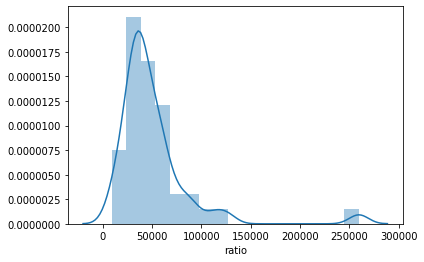

In [410]:
sns.distplot(resdf1.ratio)


In [422]:
import numpy as np


In [428]:
resdf1.ratio.quantile(q = 0.50)

39776.0

In [429]:
resdf1.describe()

,County,ratio
count,45,45.000000
unique,45,45.000000
top,Tulare,66551.571429
freq,1,1.000000


In [408]:
analysis = TTestIndPower()

# parameters for power analysis
effect = 0.5
alpha = .05

power = .7
# perform power analysis
analysis = TTestIndPower()
result = analysis.solve_power(effect, power=power, nobs1= None, ratio=1.0, alpha = alpha)
print('Sample Size: %.3f' % result)

Sample Size: 50.354


In [109]:
for row in list_a[0].findAll('tr')[2:100]:
    print(row)
    print(row.find('a'))

<tr><td><a href="/zip-code/90002/zip-code-90002.asp" title="ZIP Code 90002">ZIP Code 90002</a></td><td><a href="/city/ca-los-angeles.asp" title="Los Angeles, CA">Los Angeles</a></td><td><a href="/county/ca-los-angeles.asp">Los Angeles</a></td><td>Standard</td></tr>
<a href="/zip-code/90002/zip-code-90002.asp" title="ZIP Code 90002">ZIP Code 90002</a>
<tr><td><a href="/zip-code/90003/zip-code-90003.asp" title="ZIP Code 90003">ZIP Code 90003</a></td><td><a href="/city/ca-los-angeles.asp" title="Los Angeles, CA">Los Angeles</a></td><td><a href="/county/ca-los-angeles.asp">Los Angeles</a></td><td>Standard</td></tr>
<a href="/zip-code/90003/zip-code-90003.asp" title="ZIP Code 90003">ZIP Code 90003</a>
<tr><td><a href="/zip-code/90004/zip-code-90004.asp" title="ZIP Code 90004">ZIP Code 90004</a></td><td><a href="/city/ca-los-angeles.asp" title="Los Angeles, CA">Los Angeles</a></td><td><a href="/county/ca-los-angeles.asp">Los Angeles</a></td><td>Standard</td></tr>
<a href="/zip-code/90004/zip

In [89]:
soup = BeautifulSoup(page.content, 'html.parser')


In [90]:
print(soup.prettify()

SyntaxError: unexpected EOF while parsing (<ipython-input-90-e963e39333de>, line 1)

In [70]:
html = list(soup.children)[3]
[type(item) for item in list(soup.children)]

[bs4.element.NavigableString,
 bs4.element.Doctype,
 bs4.element.NavigableString,
 bs4.element.Tag]

In [91]:
list(html.children);